In [13]:
import numpy as np

import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D

def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            print(Rlist)
    R = Permutation(Rlist)
    print("R = ", R)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))
        print(Llist)

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)
    print("L = ", L)
    print("twisted_faces = ", R*L)    
    return R*L #, R, L, D

def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad(G,do_twist=True):
    D = getD(G)
    F = twisted_faces2(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return L


def number_of_CDC(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return CDC


def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

def twisted_faces3(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
    R = Permutation(Rlist)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)  
    return R*L #, R, L, D






def sample_number_of_twisted_faces3(G,samples=10,do_twist=True):
    return [len(twisted_faces3(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad3(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges3(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return L


def number_of_CDC3(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return CDC


def change_tuple(x,y):
    L = (x,y)
    L = list(L)
    L.reverse()
    return tuple(L)


def Faces(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    L = []
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        E = edges    
        E.append(E[0])
        for i in range(1, (len(E)-1)):
            (x,y) = E[i+1]
            for j in range(2):
                if E[i][1] != E[i+1][0]:
                    E[i+1] = change_tuple(x,y)
        E.remove(E[0])
        L.append(E)
    return L

def Num_Bad_Pos_Neg(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    print("Bad Negative = ", Bad_Neg/2)
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    print("Bad Positive = ", Bad_Pos/2)
    return Bad_Neg/2, Bad_Pos/2


def Num_Bad_Pos_Neg1(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    return Bad_Neg/2, Bad_Pos/2


def List_Bad_Pos_Neg(G ,do_twist=True):
    L = list(Num_Bad_Pos_Neg1(G ,do_twist=do_twist))
    return L


def exp_number_of_Bad_Neg_Pos(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,samples)
        g.append(e- (L[0]+L[1]))
        Neg.append(L[0])
        Pos.append(L[1])
    return [exp_size(Neg).n(20), exp_size(Pos).n(20), exp_size(g).n(20)]

    
    

def Neg_Pos_Good(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    T = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,do_twist = do_twist)
        g.append(e-(L[0]+L[1]))
        Neg.append(L[0])
        Pos.append(L[1])
        L.append(e-(L[0]+L[1]))
        T.append(L)
    return T

    

In [14]:
G = graphs.CompleteGraph(4)

In [17]:
Neg_Pos_Good(G,samples=100,do_twist=True)

[[4, 2, 0],
 [2, 1, 3],
 [2, 1, 3],
 [2, 1, 3],
 [3, 3, 0],
 [2, 1, 3],
 [3, 3, 0],
 [0, 2, 4],
 [1, 1, 4],
 [0, 3, 3],
 [2, 1, 3],
 [3, 3, 0],
 [4, 2, 0],
 [3, 3, 0],
 [2, 1, 3],
 [2, 1, 3],
 [2, 1, 3],
 [3, 3, 0],
 [2, 1, 3],
 [1, 0, 5],
 [0, 0, 6],
 [2, 1, 3],
 [1, 1, 4],
 [3, 3, 0],
 [2, 1, 3],
 [0, 2, 4],
 [3, 3, 0],
 [1, 0, 5],
 [0, 0, 6],
 [1, 0, 5],
 [1, 1, 4],
 [2, 0, 4],
 [4, 2, 0],
 [1, 1, 4],
 [3, 3, 0],
 [2, 1, 3],
 [1, 0, 5],
 [3, 3, 0],
 [4, 2, 0],
 [0, 3, 3],
 [1, 0, 5],
 [0, 3, 3],
 [2, 1, 3],
 [2, 1, 3],
 [4, 2, 0],
 [4, 2, 0],
 [4, 2, 0],
 [4, 2, 0],
 [3, 3, 0],
 [0, 3, 3],
 [0, 3, 3],
 [3, 3, 0],
 [2, 1, 3],
 [3, 3, 0],
 [0, 0, 6],
 [3, 3, 0],
 [1, 1, 4],
 [4, 2, 0],
 [3, 3, 0],
 [3, 3, 0],
 [0, 0, 6],
 [1, 0, 5],
 [0, 0, 6],
 [1, 1, 4],
 [3, 3, 0],
 [4, 2, 0],
 [4, 2, 0],
 [3, 3, 0],
 [1, 1, 4],
 [2, 1, 3],
 [1, 1, 4],
 [4, 2, 0],
 [0, 3, 3],
 [1, 1, 4],
 [3, 3, 0],
 [1, 0, 5],
 [1, 1, 4],
 [2, 1, 3],
 [4, 2, 0],
 [4, 2, 0],
 [2, 0, 4],
 [2, 1, 3],
 [1, 1, 4],
 [2,

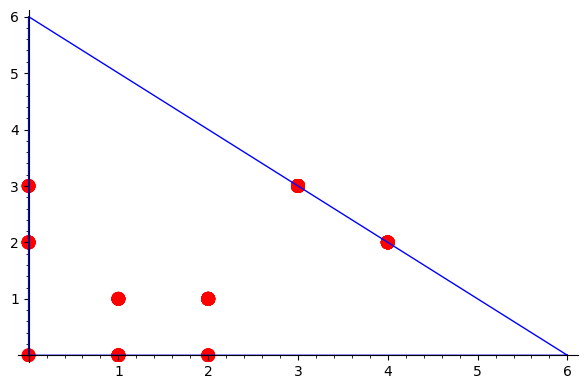

In [18]:
G = graphs.CompleteGraph(4)
L = N_P_G(G, samples=100)

line([(6,0),(0,6),(0,0),(6,0)])+points([(x[0],x[1]) for x in L], color='red', size=100)

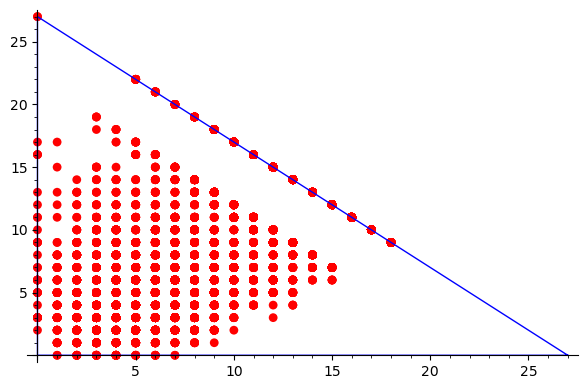

In [34]:
B2 = graphs.BlanusaSecondSnarkGraph()
L = N_P_G(B1, samples=10000, do_twist=True)

m = B2.num_edges()

line([(m,0),(0,m),(0,0),(m,0)])+points([(x[0],x[1]) for x in L], color='red', size=40)

In [36]:
len([x for x in L if x[0]==0])

39

In [46]:
def diagram_N_P_G(G, samples=10, do_twist=True):
    m = G.num_edges()
    L = N_P_G(G, samples = samples, do_twist = do_twist)
    
    return line([(m,0),(0,m),(0,0),(m,0)])+points([(x[0],x[1]) for x in L], color='red', size=40)

In [47]:
G = graphs.CompleteGraph(4)

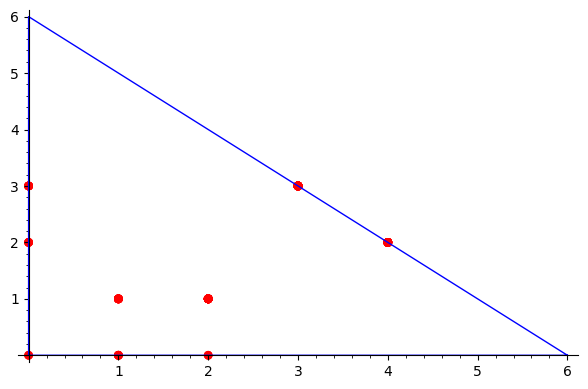

In [48]:
diagram_N_P_G(G, samples=100, do_twist=True)

In [49]:
pt = graphs.PetersenGraph()

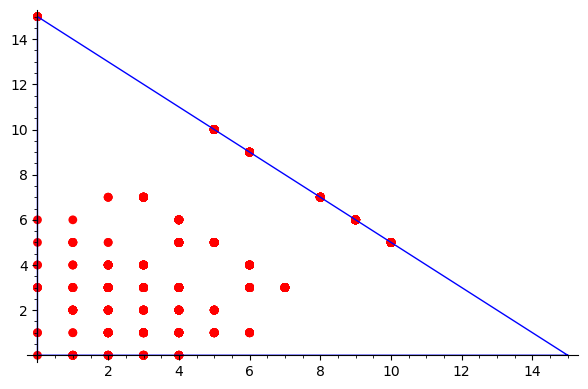

In [51]:
diagram_N_P_G(pt, samples=1000, do_twist=True)

In [54]:
def diagram_N_P_G1(G, samples=10, do_twist=True):
    m = G.num_edges()
    L = N_P_G(G, samples = samples, do_twist = do_twist)
    
    return line([(m,0),(0,m),(0,0),(m,0)])+points([(x[0],x[1]) for x in L], color='red', size=40)+ points([(x[0]) for x in L], color='black', size=60)

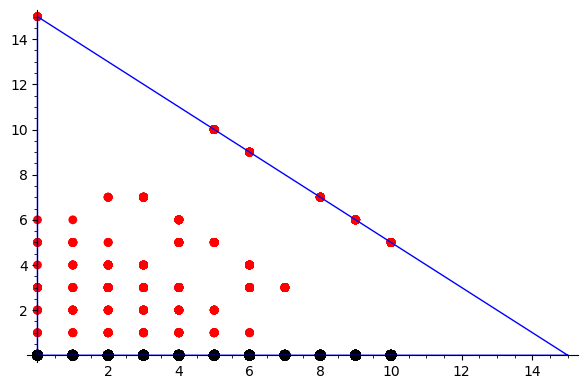

In [55]:
diagram_N_P_G1(pt, samples=1000, do_twist=True)